In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import functools
import math

---
# Геометрическая вероятность
---

### **Задача.**

---

Во время непогоды на участке между $40$-ым и $70$-ым километрами телефонной линии произошел обрыв провода. Считая, что обрыв провода одинаково возможен в любой точке, найти вероятность того, что обрыв расположен между $40$-ым и $45$-ым километрами.

---

$$
\dfrac{45-40}{70-40}=\dfrac{1}{6} = 0.1(6)
$$

---

In [ ]:
experiment = np.random.uniform(40, 70, 1000000)
experiment[(experiment > 40) & (experiment < 45)].size / experiment.size

0.167109

Можем посмотреть на распределение частот:

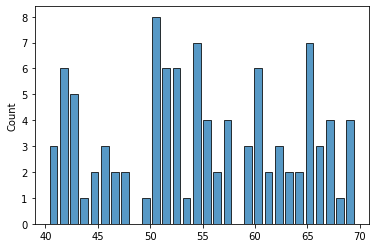

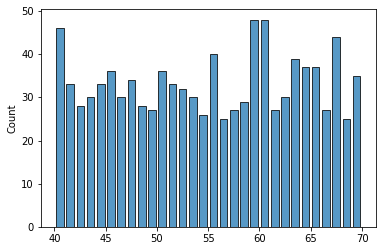

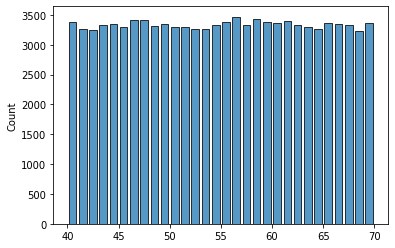

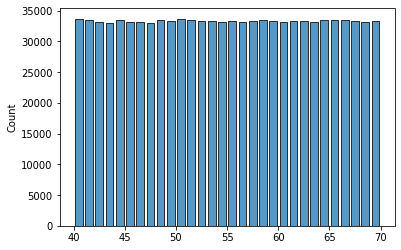

In [ ]:
for t in [100, 1000, 100000, 1000000]:
    experiment = np.random.uniform(40, 70, t)
    sns.histplot(experiment, bins=30, shrink=0.75)
    plt.show()

### **Задача.**

---

Чтобы добраться в институт, Петя может поехать на автобусе одного из двух возможных маршрутов. Автобусы первого маршрута следуют с интервалом в 18 минут, а автобусы второго — с интервалом в 15 минут (автобусы ездят независимо). Какова вероятность того, что Петя, пришедший в случайный момент времени, будет ждать автобуса не более 10 минут?

---

![](https://cdn2.openedu.ru/assets/courseware/v1/27c198acb6e2af59252c636cef573355/asset-v1:ITMOUniversity+APPSTAT+fall_2022_ITMO+type@asset+block/pic_3_1.png)

$$P(A)=\dfrac{\lambda(A)}{\lambda(\omega)}=\dfrac{230}{270}\approx 0.8519$$

---

In [ ]:
t = 1000000
experiment_1 = np.random.uniform(0, 15, t)
experiment_2 = np.random.uniform(0, 18, t)
np.array((experiment_1 <= 10) | (experiment_2 <= 10)).sum() / t

0.851901

### **Задача.**

---

На отрезке $OA$ длины 5 числовой оси $Ox$ наудачу поставлены две точки $B$ и $C$. Найти вероятность, что из трех получившихся отрезков можно построить треугольник.

---

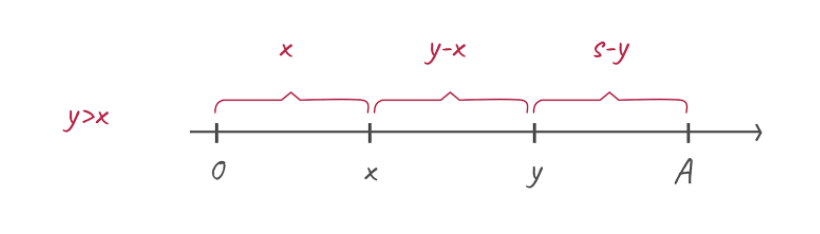

---

$$
\begin{cases}
x + y- x > 5 - y, \\
y - x + 5 - y > x, \\
x + 5 - y > y - x
\end{cases} \Leftrightarrow
\begin{cases}
y > \frac{5}{2}, \\
x \lt \frac{5}{2}, \\
y \lt x + \frac{5}{2}.
\end{cases}
$$

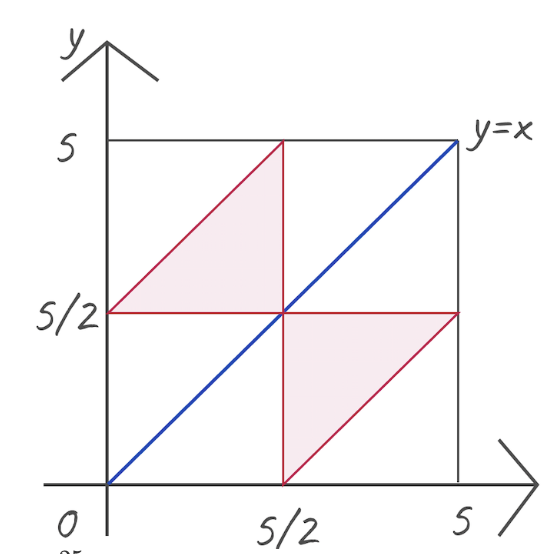

Правильный ответ: $1/4$

In [ ]:
t = 1000000
experiment = np.random.uniform(0, 5, (2, t))
experiment = np.sort(experiment, axis=0)
side_lens = np.array([
    experiment[0],
    experiment[1] - experiment[0],
    5 - experiment[1]
])
np.array((side_lens[0] + side_lens[1] > side_lens[2]) &
         (side_lens[1] + side_lens[2] > side_lens[0]) &
         (side_lens[0] + side_lens[2] > side_lens[1])).sum() / t

0.250153

----
# Общее определение вероятностного пространства
---

### **Задача.**

---

Электрическая цепь состоит из элементов $A_k$, схема цепи представлена на рисунке.

![](https://cdn2.openedu.ru/assets/courseware/v1/282d925fedfd9a5c24d57474bb6b1704/asset-v1:ITMOUniversity+APPSTAT+fall_2022_ITMO+type@asset+block/schema.png)

Какова вероятность, что ток пройдет по цепи, если элементы $A_k$ выходят из строя независимо, а вероятность выхода из строя элемента $A_k$ равна $p_k$?

---

$$
(1 - p_4) \cdot (1 - p_1 \cdot (1 - (1 - p_2)\cdot(1-p_3)))
$$

In [ ]:
p1, p2, p3, p4 = 0.2, 0.4, 0.5, 0.7
(1-p4)*(1-p1*(1-(1-p2)*(1-p3)))

0.258

In [ ]:
t = 1000000

experiment = np.array([
    np.random.choice([0, 1], t, p=[p1, 1 - p1]),
    np.random.choice([0, 1], t, p=[p2, 1 - p2]),
    np.random.choice([0, 1], t, p=[p3, 1 - p3]),
    np.random.choice([0, 1], t, p=[p4, 1 - p4])
]) # 1 — не вышел из строя, 0 — вышел из строя
success = 0
for i in range(t):
  if (experiment[0][i] == 1 or (experiment[1][i] == 1 and experiment[2][i] == 1)) and experiment[3][i] == 1:
    success += 1

success/t

0.257469

### **Задача.**

---

Подводная лодка атакует корабль, выпуская по нему последовательно и независимо одну за другой $n=3$ торпед. Каждая торпеда попадает в корабль с вероятностью $p=0.9$ и, при попадании, — с одинаковой вероятностью в любой из $k=5$ отсеков, на которые разделена подводная часть корабля. Торпеда, попавшая в отсек, приводит к его затоплению водой. Корабль идёт ко дну, если водой заполнено не менее двух отсеков. С какой вероятностью корабль будет затоплен?

---

$$
\mathbb P(A)=\sum\limits_{i=2}^n C^i_n p^i (1-p)^{n-i}\left(1-\dfrac{1}{k^{i-1}}\right)
$$

Пусть событие $A$ заключается в том, что корабль затоплен. Логично рассмотреть события: $H_i$ -- «в корабль попало ровно $i$ ракет». Тогда $\mathbb P(A)=\mathbb P(H_1)\mathbb P(A|H_1) +...+\mathbb P(H_n)\mathbb P(A|H_n)$. Вероятность события $H_i$ легко вычисляется согласно схеме Бернулли, и равна

$$\mathbb P(H_i) = C_n^i p^i(1-p)^{n-i}$$

Осталось вычислить условную вероятность $\mathbb P(A|H_i)$. По условию, $\mathbb P(A|H_1) = 0$. При $i\geq 2$ корабль не затопляется, только если все торпеды попали в один отек. Тогда

$$\mathbb P(A|H_i) = 1 - k \left(\dfrac{1}{k} \right)^i = 1 - \dfrac{1}{k^{i - 1}}.$$

Итого,

$$\mathbb P(A) = \sum\limits_{i = 2}^{n}  C_n^i p^i (1 - p)^{n - i} \left(1 - \dfrac{1}{k^{i - 1}} \right).$$

Тогда для $n=3$, $p=0.9$, $k=5$ получим:

$$\mathbb P(A) = C_3^2 0.9^2 (1 - 0.9)^{1} \left(1 - \dfrac{1}{5} \right) + C_3^3 0.9^3 (1 - 0.9)^{0} \left(1 - \dfrac{1}{5^{2}} \right) = \dfrac{5589}{6250}\approx 0.8942$$

---


In [ ]:
n, k, p = 3, 5, 0.9

sum([
    math.comb(n, i) * p ** i * (1 - p) ** (n - i) * (1 - 1 / (k ** (i - 1)))
    for i in range(2, n + 1)
])

0.89424

In [ ]:
t = 1000000

experiment = np.array([
    np.random.choice([0, 1], t, p=[1 - p, p]) * np.random.choice(list(range(1, k + 1)), t)
    for _ in range(n)
])

hit_matrix = np.array([
    functools.reduce(lambda a, b: a | b, [experiment[i] == j for i in range(n)])
    for j in range(1, k + 1)
])

np.array(hit_matrix.sum(axis=0) >= 2).sum() / t

0.894291

---
# Случайные величины и их распределения
---

### **Задача.**

---

Случайная величина $\xi$ может принимать значения с ненулевой вероятностью только на отрезке $\left[0, \frac\pi 4\right]$, при этом ее функция распределения на этом отрезке задается выражением $a\cdot\sin x$.

1. Найдите правую границу интервала возможных значений $a$.
2. Найдите среднее возможное значение для параметра $a$. По найденному значению найдите вероятность события $\xi=\frac \pi 4$.
3. Найдите такое значение $a$, чтобы функция распределения была непрерывна. При этом значении вычислите вероятность события $\xi\in\left[0,\frac \pi 6\right]$.

---

Функция распределения выглядит так:
$$
F_\xi(x)=\begin{cases}
1\quad & x>\frac \pi 4 \\
a\cdot \sin x\quad &  x\in \left(0, \frac \pi 4\right] \\
0\quad & x\leq 0
\end{cases}
$$

1. Функция распределения $F_\xi$ должна быть везде неубывающая, поэтому, как минимум, $a\geq 0$. Т.к. при $a>0$ функция $a\cdot \sin x$ возрастает на $\left[0,\frac \pi 4\right]$, то максимальное значение $a$ будет удовлетворять равенству $a\cdot\sin\left(\frac\pi 4\right)=1$. Т.е. $a_{max}=\sqrt 2$.
2. Т.к. $a\in\left[ 0, {\sqrt 2} \right]$, то $a_{mean}=\frac{\sqrt 2}{2}$. При этом значении, распределение вероятности не будет абсолютно непрерывным, поэтому вероятность события $\xi=\frac \pi 4$ можно посчитать так: $F_\xi(\frac \pi  4+0) - F_\xi(\frac \pi  4 - 0)=1 - \frac{\sqrt 2}{2} \sin\left( \frac\pi 4 \right)=0.5$
3. Для непрерывности функции распределения нужно, чтобы: $\lim\limits_{x\to 0+} F_\xi = 0$ и $\lim\limits_{x\to \frac \pi 4 -} F_\xi=1$. Тогда $a=\sqrt 2$. Вероятность события $\xi\in\left[0,\frac \pi 6\right]=[a,b]$ можно посчитать, как: $F_\xi(b)-F_\xi(b)=F_\xi\left(\frac\pi 6\right) - F_\xi(0)=a\sin x \bigg|_{0}^{\frac\pi 6}=\sqrt 2 \sin\left(\frac\pi 6\right)=\frac{\sqrt 2}{2}\approx 0.7071$.

---

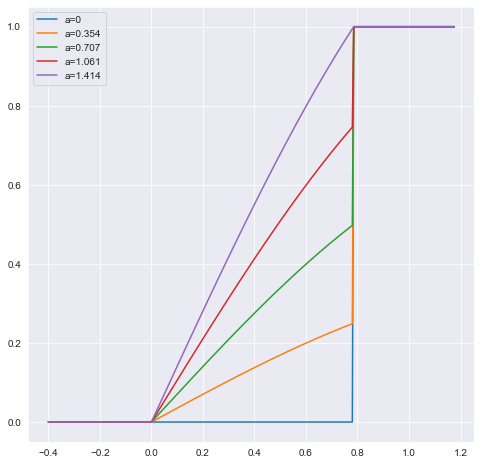

In [ ]:
plt.figure(figsize=(8, 8))
for a in [0, math.sqrt(2) / 4, math.sqrt(2) / 2, 3 * math.sqrt(2) / 4, math.sqrt(2)]:
    x = np.arange(0, math.pi / 4, 0.01)
    y = a * np.sin(x)

    left_x, right_x = np.arange(-0.4, 0, 0.01), np.arange(math.pi / 4, math.pi / 4 + 0.4, 0.01)
    left_y, right_y = np.zeros(left_x.size), np.ones(right_x.size)

    plt.plot(
        np.concatenate((left_x, x, right_x), axis=None),
        np.concatenate((left_y, y, right_y), axis=None),
        label=f'a={round(a,3)}'
    )
plt.legend()
plt.show()

In [ ]:
a_mean = math.sqrt(2) / 2

def F_xi(x, a):
    if x <= 0:
        return 0
    elif x <= math.pi / 4:
        return a * math.sin(x)
    else:
        return 1

xi, epsilon = math.pi / 4, 1e-5

F_xi(math.pi / 4 + epsilon, a_mean) - F_xi(math.pi / 4, a_mean)

0.5

In [ ]:
xi_interval = (0, math.pi / 6)
a_continuous = math.sqrt(2)

F_xi(xi_interval[1], a_continuous) - F_xi(xi_interval[0], a_continuous)

0.7071067811865475